# Edge Detection - Canny

## Import all the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load and display an image

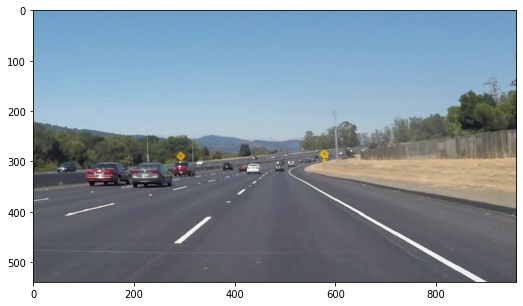

In [2]:
img = cv2.imread("img/lane_1.jpg") # OpenCV image format is`BGR`.
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Convert an image into grayscale

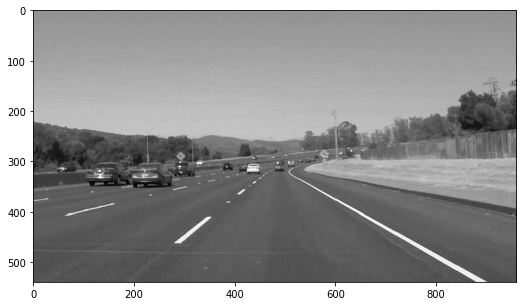

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(gray, cmap='gray')

## White mask

Sort out the white color out of the image.

Text(0.5, 1.0, 'Mask White Image')

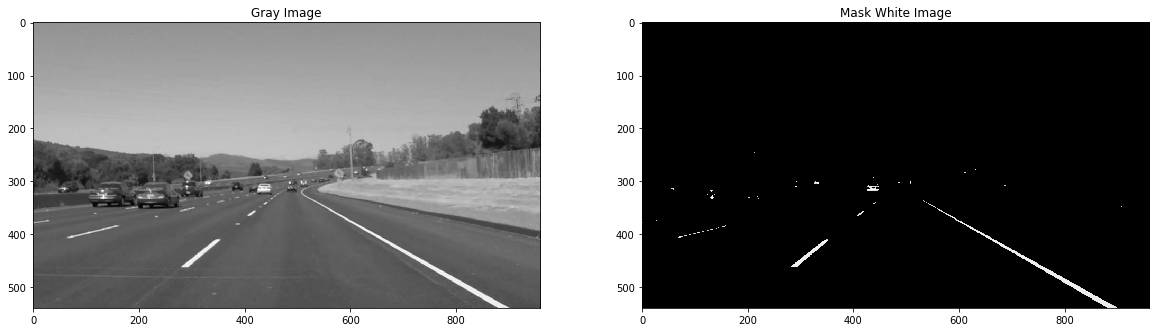

In [4]:
# Uncomment or comment and see what happen.

gray_copy = np.copy(gray)
gray_copy[(gray_copy[:,:] < 200)] = 0

plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image") 
plt.subplot(122)
plt.imshow(gray_copy, cmap='gray')
plt.title("Mask White Image")

## Blurring - GaussianBlur

- Smoothing images: reduce noise


In [5]:
#blur_gray = cv2.GaussianBlur(gray, (5, 5), 0)
blur_gray = cv2.GaussianBlur(gray_copy, (5, 5), 0)

## Canny

In [6]:
# cv2.Canny(src, minVal, maxVal)
edges = cv2.Canny(blur_gray, 50, 150)
#np.set_printoptions(threshold=np.inf)
#print(edges)

## Display results

Text(0.5, 1.0, 'Edge Image')

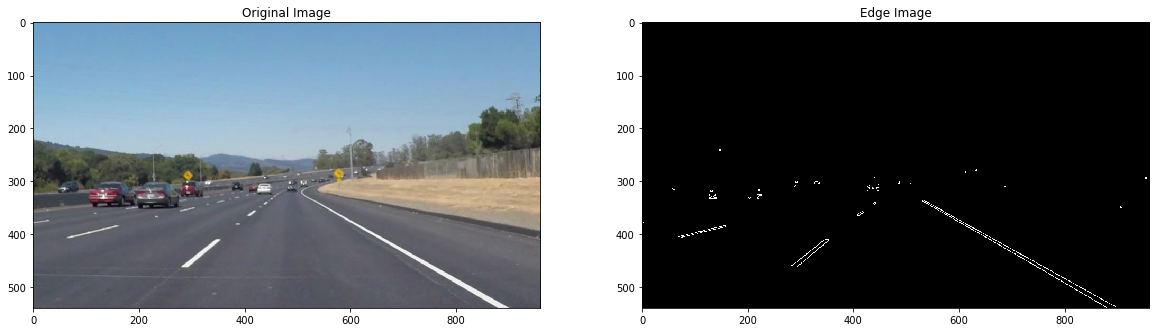

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image") 
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title("Edge Image")

# Canny Algorithm [Option]

## Canny Edge Detector

- [Wiki - Canny edge detector](https://en.wikipedia.org/wiki/Canny_edge_detector)

- [OpenCV - Canny Edge Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

Canny Edge Detection is a popular edge detection algorithm.
It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

1. Noise Reduction:

    remove the noise in the image with 5x5 Gaussian filter.


2. Finding Intensity Gradient of the image:

    Smoothened image is then filtered with a `Sobel` kernel in both horizontal and vertical direction to get first derivative in horizontal direction (Gx) and vertical direction (Gy).
    

3. Non-maximum Suppression

    1. Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
    2. If the edge strength of the current pixel is the largest compared to the other pixels in the mask with the same direction (e.g., a pixel that is pointing in the y-direction will be compared to the pixel above and below it in the vertical axis), the value will be preserved. Otherwise, the value will be suppressed (put to zero).
    

4. Double Threshold (Hysteresis Thresholding)

    `This stage decides which are all edges are really edges and which are not. `
    
    For this, we need two threshold valuse, `high` and `low` (in 2:1 or 3:1):
    
    - If an edge pixel’s gradient value is `higher than the high threshold value`, it is marked as a `strong edge` pixel. 
    - If an edge pixel’s gradient value is `smaller than the high threshold value and larger than the low threshold value`, it is marked as a `weak edge` pixel. 
    - If an edge pixel's value is `smaller than the low threshold value`, it will be `suppressed`.